In [1]:
import pandas as pd
data=pd.read_excel('./data/供应链商品销售数据.xlsx')

In [5]:
data1=data.loc[data['销售点类型']=='社区店']

In [6]:
data.loc[data['销售点类型']=='社区店']

,商品代号,销售月份,销售点类型,销售额（万元）
1,Safety 8,August,社区店,10.0
2,Safety 2,February,社区店,10.0
3,Safety 8,November,社区店,10.0
4,Tape 10,October,社区店,2.5
5,Safety 8,January,社区店,10.0
...,...,...,...,...
1315,Safety 2,July,社区店,10.0
1316,Safety 8,September,社区店,10.0
1318,Tape 10,August,社区店,2.5
1321,Tape 10,November,社区店,2.5


In [7]:
import numpy as np
data2=data1[['销售点类型','销售额（万元）']].groupby(by='销售点类型')

In [8]:
number=data2.agg(np.sum)

In [9]:
data2.agg(np.sum)

,销售额（万元）
销售点类型,
社区店,4606.5


In [10]:
data3=data.loc[data['销售点类型']=='CBD店']

In [11]:
data.loc[data['销售点类型']=='CBD店']

,商品代号,销售月份,销售点类型,销售额（万元）
0,Tape 10,April,CBD店,2.5
6,Safety 8,December,CBD店,10.0
7,Safety 1,September,CBD店,12.0
11,Safety 8,August,CBD店,10.0
12,Safety 8,October,CBD店,10.0
...,...,...,...,...
1319,Safety 1,September,CBD店,12.0
1320,Safety 8,May,CBD店,10.0
1322,Safety 1,October,CBD店,12.0
1323,Safety 8,October,CBD店,10.0


In [12]:
import numpy as np
data4=data3[['销售点类型','销售额（万元）']].groupby(by='销售点类型')

In [13]:
data4.agg(np.sum)

,销售额（万元）
销售点类型,
CBD店,4985.5


In [14]:
from pyecharts.charts import Bar
import pyecharts.options as opts

num=['CBD店','社区店']
num2=[4985.5,4606.5]
(
      Bar(init_opts=opts.InitOpts(width='720px',height='320px'))#画布大小
      .add_xaxis(xaxis_data=num)
      .add_yaxis(series_name='',y_axis=num2)
      .set_global_opts(title_opts=opts.TitleOpts(title='总的销售额对比'))
).render_notebook()

D:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


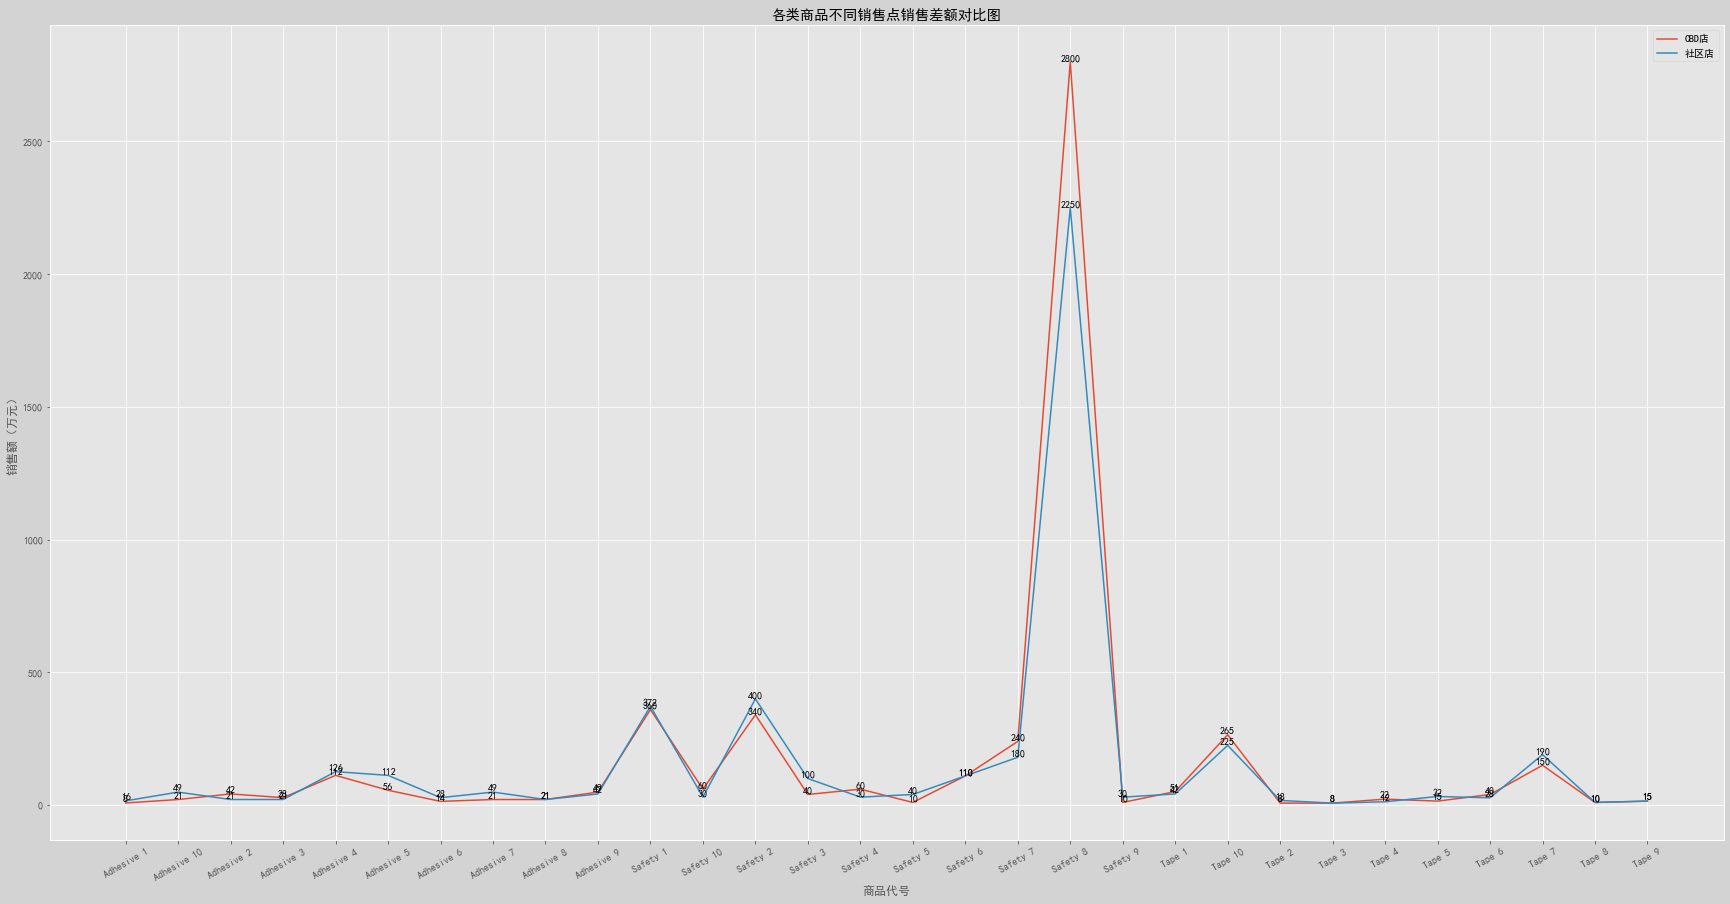

In [16]:
type = pd.pivot_table(data[['商品代号', '销售点类型', '销售额（万元）']], 
               index=['销售点类型', '商品代号'],aggfunc=np.sum) # 创建透视表 （形成两店的商品代号与销售额关系表）

type1 = type.loc['CBD店'] # 切分CBD店（CBD店商品代与销售额关系表）
type2 = type.loc['社区店'] # 切分社区店（社区店商品代号与销售额关系表）
xtext = type1.index # 商品代号序列
# 折线图 ： plt.plot()

import matplotlib.pyplot as plt

# 横坐标销售点类型

plt.figure(figsize=(30, 15), facecolor = 'lightgray') # 设置画布大小
plt.style.use('ggplot') #设置背景风格
plt.plot(range(len(type1+1)), type1['销售额（万元）']) # 绘制CBD店商品代号与销售额关系的折线图
plt.plot(range(len(type2+1)), type2['销售额（万元）']) # 绘制社区店商品代号与销售额关系的折线图

# 设置matplotlib正常显示中文和负号
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 对应位置 添加注释 （对齐方式垂直方向ha&水平方向va） 
for i,j in zip( range(len(type1)),type1['销售额（万元）'] ):
    plt.text(i, j, '%.0f'%j, ha='center', va='bottom')
for i,j in zip( range(len(type2)),type2['销售额（万元）'] ):
    plt.text(i, j, '%.0f'%j, ha='center', va='bottom')

plt.xlabel('商品代号')   # 行标签
plt.ylabel('销售额（万元）')   # 列标签
plt.legend(['CBD店', '社区店'])  # 自动匹配第一个第二个线的标签
plt.xticks(range(0,30),xtext, rotation=30) # 设置x坐标轴标签 （rotation 旋转角度）
plt.title('各类商品不同销售点销售差额对比图') # 标题
plt.show()